In [1]:
# Inspired by https://www.kaggle.com/ashwani07/mnist-classification-using-random-forest

In [14]:
import requests
from pathlib import Path
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt  #Graphics
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV 
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import datasets, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
#To show graphs within the notebook
%matplotlib inline 

## Download Dataset

In [15]:
mnist_file = 'mnist.csv'
mnist_file_path = Path(mnist_file)
if not mnist_file_path.is_file():
    # file exists
    print('Dataset does not exist. Downloading...')
    csv_url = 'https://raw.githubusercontent.com/MSc-in-Data-Science/class_material/master/semester_1/Machine_Learning/datasets/digit_recognizer_dataset.csv'
    req = requests.get(csv_url)
    url_content = req.content
    csv_file = open('mnist.csv', 'wb')
    csv_file.write(url_content)
    csv_file.close()
    print('Dataset Downloaded')
else:
    print('Dataset exists')

Dataset exists


In [16]:
#load the datasets
train = pd.read_csv("mnist.csv").astype('int32')
print ("Training dataset has %i observations and %i variables" %(train.shape[0], train.shape[1]-1))

Training dataset has 42000 observations and 784 variables


In [17]:
#check few rows
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
#Seperate the target and independant variables
df_x=train.iloc[:,1:]
df_y=train.iloc[:,0]

In [19]:
def print_image(row, df):
    temp=df.iloc[row,:].values
    temp = temp.reshape(28,28).astype('uint8')
    plt.imshow(temp)

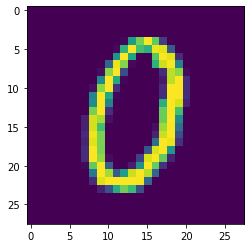

In [20]:
print_image(5, df_x)

C:\Users\skoul\Documents\bouzios_ml\machine_learning_master_2020\exercise_2\.venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: label, dtype: int64

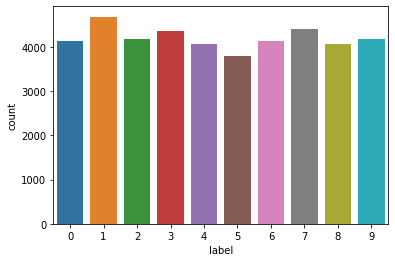

In [21]:
#Check the frequency of each number
sns.countplot(df_y)
df_y.value_counts().sort_index()

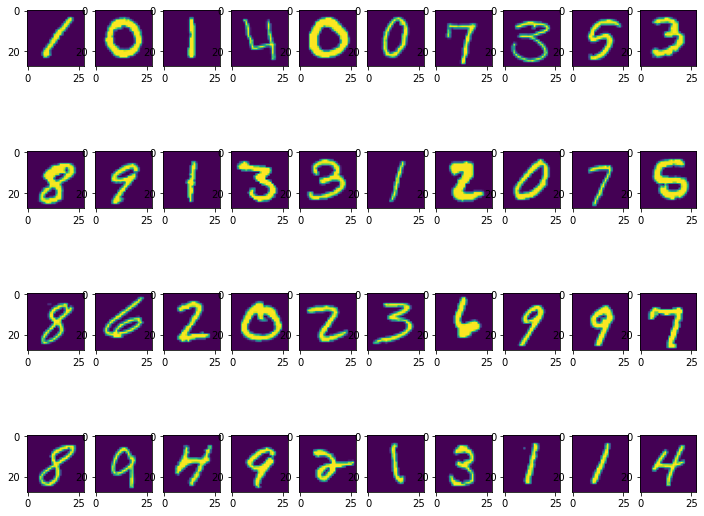

In [22]:
# Print some of the digits/images to inspect the dataset
plt.figure(figsize=(12,10))
for i in range(40):
    plt.subplot(4, 10, i+1)
    print_image(i, df_x)

In [23]:
#Split the dataset

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)

(29400, 784)
(12600, 784)


## Feature Selection or Reduction

## PCA

In [24]:
def perform_classification(clf_name, X_train, X_test, y_train, y_test):
    if clf_name=='Random Forest':
        clf=RandomForestClassifier(n_estimators=100)
        clf.fit(X_train,y_train)
        pred=clf.predict(X_test)

    elif clf_name=='SVM rbf':
        clf = svm.SVC(kernel='rbf')
        clf.fit(X_train,y_train)
        pred=clf.predict(X_test)

    elif clf_name=='SVM linear':
        clf = svm.SVC(kernel='linear')
        clf.fit(X_train,y_train)
        pred=clf.predict(X_test)
        
    elif clf_name=='kNN':
        clf = KNeighborsClassifier()
        clf.fit(X_train_new ,y_train)
        pred=clf.predict(X_test)


    elif clf_name=='Logistic Regression':
        clf = LogisticRegression()
        clf.fit(X_train,y_train)
        pred=clf.predict(X_test)
        
    else:
        print('Provide onr of the available classifiers')
        return
    
    print ("Classification Report")
    print(classification_report(y_test, pred))
#     print ("Confusion Report")
#     print(confusion_matrix(y_test, pred))
    

    cmrforest = confusion_matrix(y_test , pred)
    plt.figure(figsize=(10,7))
    sns.heatmap(cmrforest ,annot=True , fmt = 'd')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.title('Confusion Report')
    clf.score(X_test,y_test)
    
#     score = cross_val_score(clf, df_x_new, df_y)
#     print (np.mean(score))

In [27]:
# feature extraction
# n_components=100
scaler = MinMaxScaler()
X_train_rescaled = scaler.fit_transform(X_train)
pca = PCA(n_components = 0.95)
pca.fit(X_train)

# fig, ax = plt.subplots()

# plt.xlim(0.0,800.0)
# plt.ylim(0.0,1.1)

# plt.xlabel('number of components')
# plt.ylabel('cumulative explained variance')
# ax.plot(np.cumsum(pca.explained_variance_ratio_), color='b')
# ax.axhline(y=0.95, color='r', linestyle='dotted')
# ax.text(100, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)


X_train_new = pca.transform(X_train)
X_test_new = pca.transform(X_test)
print(X_train_new.shape)
print(X_test_new.shape)

(29400, 153)
(12600, 153)


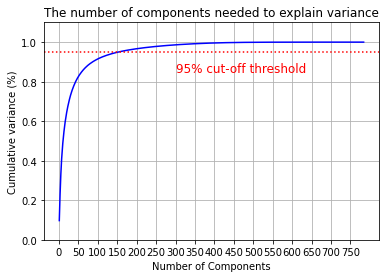

In [28]:
scaler = MinMaxScaler()
X_train_rescaled = scaler.fit_transform(X_train)
pca = PCA().fit(X_train_rescaled)

# plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 785, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 785, step=50)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='dotted')
plt.text(300, 0.85, '95% cut-off threshold', color = 'red', fontsize=12)

ax.grid()
plt.show()

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1242
           1       0.98      0.98      0.98      1429
           2       0.94      0.95      0.94      1276
           3       0.91      0.92      0.91      1298
           4       0.94      0.94      0.94      1236
           5       0.92      0.93      0.92      1119
           6       0.95      0.97      0.96      1243
           7       0.95      0.95      0.95      1334
           8       0.92      0.89      0.90      1204
           9       0.92      0.90      0.91      1219

    accuracy                           0.94     12600
   macro avg       0.94      0.94      0.94     12600
weighted avg       0.94      0.94      0.94     12600

Confusion Report
[[1206    0    4    3    2    3   17    0    6    1]
 [   0 1395   13    7    0    1    8    1    4    0]
 [  10    1 1206   13    7    2    5    7   21    4]
 [   4    1   17 1193    0   25    5   12  

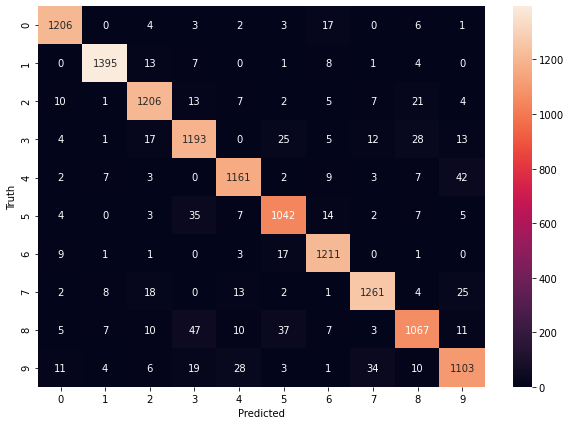

In [119]:
perform_classification('Random Forest', X_train_new, X_test_new, y_train, y_test)

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1242
           1       0.99      0.99      0.99      1429
           2       0.97      0.98      0.98      1276
           3       0.98      0.97      0.97      1298
           4       0.98      0.97      0.98      1236
           5       0.97      0.98      0.98      1119
           6       0.98      0.99      0.99      1243
           7       0.98      0.97      0.97      1334
           8       0.97      0.98      0.97      1204
           9       0.96      0.97      0.97      1219

    accuracy                           0.98     12600
   macro avg       0.98      0.98      0.98     12600
weighted avg       0.98      0.98      0.98     12600



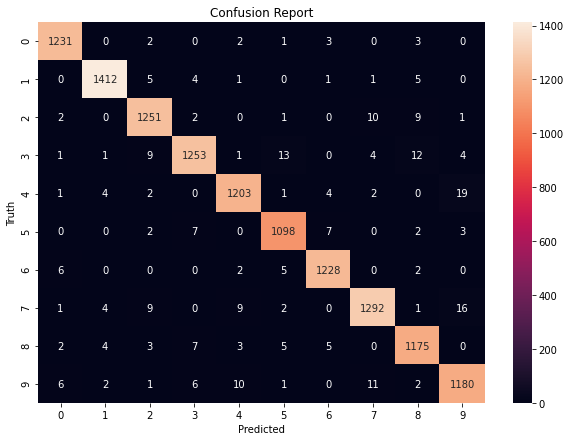

In [29]:
# perform_classification('kNN', X_train_new, X_test_new, y_train, y_test)
# perform_classification('SVM linear', X_train_new, X_test_new, y_train, y_test)
perform_classification('SVM rbf', X_train_new, X_test_new, y_train, y_test)
# perform_classification('Logistic Regression', X_train_new, X_test_new, y_train, y_test)

C:\Users\skoul\Documents\bouzios_ml\machine_learning_master_2020\exercise_2\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1242
           1       0.94      0.97      0.95      1429
           2       0.94      0.90      0.92      1276
           3       0.91      0.90      0.90      1298
           4       0.91      0.93      0.92      1236
           5       0.89      0.86      0.87      1119
           6       0.92      0.96      0.94      1243
           7       0.94      0.93      0.93      1334
           8       0.90      0.84      0.87      1204
           9       0.88      0.89      0.88      1219

    accuracy                           0.92     12600
   macro avg       0.91      0.91      0.91     12600
weighted avg       0.92      0.92      0.92     12600



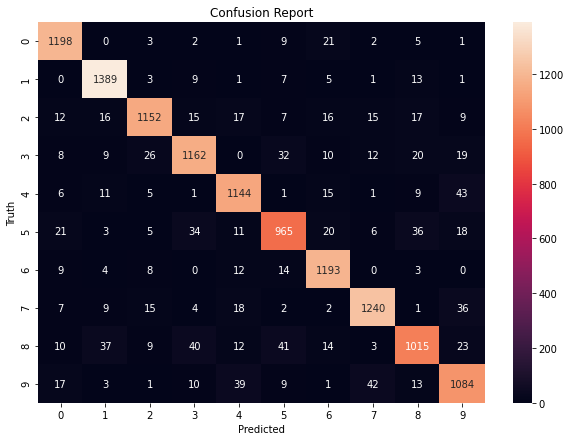

In [30]:
# perform_classification('kNN', X_train_new, X_test_new, y_train, y_test)
# perform_classification('SVM linear', X_train_new, X_test_new, y_train, y_test)
# perform_classification('SVM rbf', X_train_new, X_test_new, y_train, y_test)
perform_classification('Logistic Regression', X_train_new, X_test_new, y_train, y_test)

In [ ]:
# perform_classification('kNN', X_train_new, X_test_new, y_train, y_test)
# perform_classification('SVM linear', X_train_new, X_test_new, y_train, y_test)
# perform_classification('SVM rbf', X_train_new, X_test_new, y_train, y_test)
# perform_classification('Logistic Regression', X_train_new, X_test_new, y_train, y_test)

In [ ]:
perform_classification('kNN', X_train_new, X_test_new, y_train, y_test)
# perform_classification('SVM linear', X_train_new, X_test_new, y_train, y_test)
# perform_classification('SVM rbf', X_train_new, X_test_new, y_train, y_test)
# perform_classification('Logistic Regression', X_train_new, X_test_new, y_train, y_test)

## Feature Selection

In [30]:
best_features = SelectKBest(score_func=chi2, k=200)
fit = best_features.fit(X_train, y_train)
X_train_new = fit.transform(X_train)
X_test_new = fit.transform(X_test)


perform_classifiction('Random Forest', X_train_new, X_test_new, y_train, y_test)
perform_classifiction('kNN', X_train_new, X_test_new, y_train, y_test)
perform_classifiction('SVM linear', X_train_new, X_test_new, y_train, y_test)
perform_classifiction('SVM rbf', X_train_new, X_test_new, y_train, y_test)
perform_classifiction('Logistic Regression', X_train_new, X_test_new, y_train, y_test)



## CV

In [26]:
#Cross validation
rf=RandomForestClassifier(n_estimators=100)
rf.fit(df_x_new, df_y)


0.9449285714285715


In [ ]:
## TODO: 
# Tune algorithm, 
# show 9 missclassified as 4, 